In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Frequentist Inference and Bayes

The discussion of the Bootstrap provides an interesting segue into Frequentist inference about which we will say only enough so that you can be informed. You might have run across Frequentist inference in the past, you may have been taught Frequentist inference, and you may do Frequentist inference.

A natural follow up question would be, why Bayesian inference? In order to answer that we have to talk a wee bit about Frequentist inference.

## Background

Frequentist inference starts with the beginning of the last century, nearly 100 years ago now. The main players were R. A. Fisher on the one hand and Jerzey Neyman & Egon Pearson on the other. Fisher had a long running feud with Pearson's father and let's just say the two groups didn't get along. From all accounts, Fisher was a difficult person. They were all eugenicists.

Now, inference is still inference...neither the Frequentist nor the Bayesian approaches to statistical inference "solve" the problem of induction. They simply make different suggestions as to how we might deal with the problem. For Bayesians, we deal with the problem by assigning probability distributions to everything and using Bayes Rule. The Bayesian Approach is the only one with a solid *theoretical* foundations. Even the Frequentists agree to this.

The Frequentist Approach describes a *process* whereby we should, theoretically, make fewer errors over time when making inferences than if we did not follow this process. The Frequentist Approach is largely a collection of rules of thumb (not all of them compatible). It was, however, before the advent of the computer, the easiest approach to calculate for the typical scientist. And in an age of "Scientific Communism", anything that smacked of subjectivity (Bayesian Priors) wasn't going to fly either. Fisher actually started out as a Bayesian but hated the "subjectivity" of the priors. As it turns out, he just pushed the subjectivity under the covers.

Since Fisher on the one hand and Neyman/Pearson on the other never really finished their theories, what we got is sort of an unholy compromise between two philosophically different systems. It's no wonder that people don't understand what a **p-value** is.

Let's make sure you're not in that group.

## Sampling Distribution

The key theoretical construct of Frequentist inference is the sampling distribution. If you understand the sampling distribution, everything else pretty much falls out of that. This is why the Bootstrap is particularly interesting. 

According to the Frequentists, our goal is to infer a (fixed) property of the population from a single random sample. That property is a parameter or parameters ($\theta$) of interest just like in Bayesian statistics.

There are a few important differences, however. First, only the data is treated as a random variable. Because of this, Frequentists are interested only in the likelihood $P(D|\theta)$. This is how they get rid of the those "subjective" priors.

Second, the problem must be one in which *repeated* sampling is at least theoretically possible. We will see later that Frequentists often stretch this assumption into the realm of the mystical. Frequentists tend to see randomness as something in the world.

As a result of the last requirement, the key theoretical construct in Frequentist statistics is the **sampling distribution.** What is a sampling distribution? Glad you asked!

Suppose we have 10,000 head of cattle and we want to get a sense of how much money we'll get when they're brought to market. In order to do this, we want to estimate the average weight, $\mu$, of the population (all the cows). (Canonically, the average of a population is called $\mu$ but you can continue to think of it as $\theta$). Now, we don't want to weigh all 10,000 head, cowboys and cowgirls ain't got no time for that. Instead the cow data scientist suggests taking a random sample of 40 cattle and calculating their average weight as an estimator of the population's average weight.

We will skip some complexities here but consider...how does one get a random sample of 40 cattle? If you only pick the ones you can get to easily, that's a convenience sample. Suppose instead that all cattle are numbered, 40 numbers are drawn at random, GPS in their cow bells locates them and a helicopter swoops down and humanely lifts them into the air, weighs them, sets them back down and gives them some nice cracked corn.

Let's assume the weights of our cows are as follows:

In [3]:
cows = [1466.2, 1486.3, 1478.1, 1574.8,
        1521.7, 1499.7, 1517.7, 1495.2,
        1426.9, 1491.2, 1468.9, 1479.5,
        1465.7, 1543.4, 1477.1, 1447.2,
        1476.0, 1495.8, 1466.7, 1508.2,
        1491.2, 1473.3, 1456.9, 1434.8,
        1547.3, 1502.6, 1503.9, 1443.3,
        1396.1, 1456.3, 1616.7, 1529.3,
        1499.7, 1461.3, 1399.8, 1415.2,
        1536.5, 1529.1, 1440.6, 1473.7]

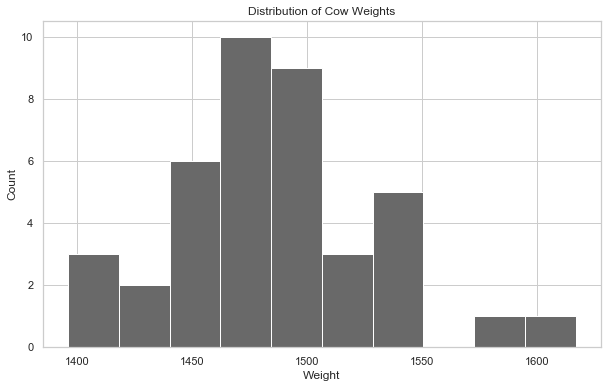

In [4]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

axes.set_title( r"Distribution of Cow Weights")
axes.set_xlabel( r"Weight")
axes.set_ylabel( "Count")
axes.hist( cows, color="dimgray")

plt.show()
plt.close()

So here's a distribution of cow weights from the single sample. The x-axis is weight, the actual variable or factor. The y-axis is counts although I could convert it to percentages (relative frequencies) or even a density. It looks vaguely normal (which may not always be the case even though I used techniques from a previous chapter to sample from a normal distribution).

The mean of the sample, called $\bar{x}$ ("eks-bar"), is:

In [5]:
print( "mean cow weight =", np.mean( cows), "lbs.")

mean cow weight = 1484.8475000000003 lbs.


So imagine if I repeated this sampling infinitely many times and calculate the mean each time. I would end up with a secondary data set--a data set like any other--that would be composed of mean cow weights. I could take the average of *that* data, I could also plot a distribution for it:

In [6]:
from numpy.random import normal

In [7]:
mean_cow_weights = []
for i in range( 10000):
    cow_weights = normal( 1500.0, 50.0, 40)
    mean_cow_weights.append( np.mean( cow_weights))

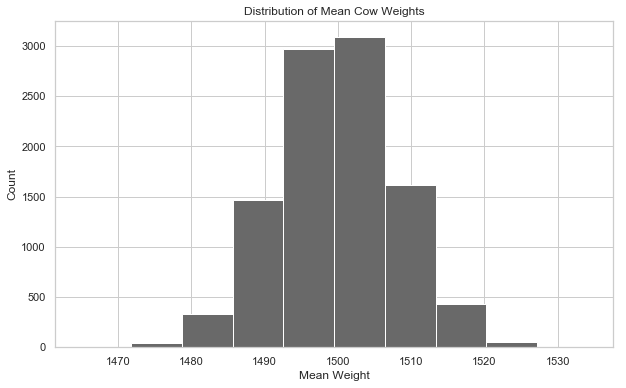

In [17]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

axes.set_title( r"Distribution of Mean Cow Weights")
axes.set_xlabel( r"Mean Weight")
axes.set_ylabel( "Count")
axes.hist( mean_cow_weights, color="dimgray")

plt.show()
plt.close()

This is an actual realization of a sampling distribution.

It's just a distribution of parameter estimates (mean cow weights) rather than the raw data (cow weights). The importance of the sampling distribution is that it tells us how spread out our estimate of the mean of the population $\mu$ is going to be based on repeated sampling and our particular estimator. As you might have guessed, $\mu=1500$ but our first sample mean was $\bar{x} = 1484$. Is that expected?

## p-value

Well, we have the data for the sampling distribution...we can see how often 1484 came up. Well, no, actually we can't because in a *density* (and these are usually densities) the probability of a single value is always 0...let's ask something slightly different. How often did does a mean of 1484 pounds or *lower* show up?

Let's count them:

In [9]:
sample_mean =  np.mean( cows)
lower_counts = [1.0 if mean <= sample_mean else 0.0 for mean in mean_cow_weights]
print( np.sum( lower_counts)/10000.0, "probability of seeing sample mean of that value or lower")

0.0299 probability of seeing sample mean of that value or lower


so if the population mean really is 1500 pounds, then seeing a result as low as 1484 pounds or lower is pretty unlikely...our sampling distribution says it only happens 2.7% of the time.

As it turns out, the statement "if the population mean really is 1500 pounds" is our **null hypothesis**. It's one of our models. The other model is "the population mean is different from 1500 pounds". Frequentist inference only lets you test two complementary, mutually exclusive and exhaustive models at a time.

The "it only happens 2.7% of the time" is our **p-value**. It is very, **very** important to note that the p-value:

1. Only makes sense in the context of the null hypothesis.
2. Depends on the estimator, the sampling design, how the data was collected, etc.
3. covers the result we saw from our sample *or more extreme*.
4. Is *not* the probability that the null hypothesis is true. That would be $P(\mu|D)$ and we're only dealing with $P(D|\mu)$.

Now the question is, which hypothesis (model) should we accept? According to the *process* of Frequentist inference, we should have specified a cut off ahead of time. Fisher used 5% for no particular reason and somehow it became codified. This cutoff or threshold is what determines which results have *statistical significance*.

We might have said, "Our threshold is going to be 1%, we will only entertain outcomes that happen at least 1 in 100 times relative to the null hypothesis." This is often where the "by chance" part sneaks in. There is really nothing about "by chance" in Frequentist statistics.

If we use the traditional 5%, then 2.7% is less than 5% and we reject the null hypothesis that the true population mean is 1500 pounds.

This is the essence of Fisher's approach to statistical inference. Fisher developed it over the years, while he was an examiner of agricultural studies. The method was a quick and easy way to apply and mostly rule out individual results that didn't seem promising. It's not altogether clear that he intended it to be used the way it has been used for the last 50 years at least.

Of course, you might have noticed something off. We can't take an infinite number of samples. This is why Frequentists require appropriate problems be reproducible in theory. We only get one sample but we must theoretically be able to take an infinite number. So what do we do? We use the sample we have to estimate the properties of the sampling distribution.

In order to estimate the standard deviation of the sampling distribution, we calculate the sample standard deviation:

$s = \sqrt{\frac{1}{n}\sum (x_i - \bar{x})^2}$

In [10]:
print( np.std( cows), "pounds")

44.34583400670237 pounds


Now, all distributions have variances and standard deviations but the standard deviation of the sampling distribution is actually called the **standard error**. We estimate it like so:

$se = \frac{s}{\sqrt{n}}$

In [11]:
se = np.std( cows)/np.sqrt( 40)
print( "se =", se)

se = 7.011692010046505


Next we calculate the *standard score*...except we don't. 

What is a standard score? Standard scores are a normalization of the difference in the observed mean and the null hypothesis to the standard normal distribution, $N(\mu=0, \sigma=1)$. Originally, we needed to do this because there were no computers and we had to look up the probabilities (and interpolate them) using tables.

$z\_score = \frac{\bar{x}-\mu}{se}$

where we can let $\mu$ be our null hypothesis. Note that it's called the "z-score" because the Normal distribution was also known as the Z distribution at one time. 

As it turns out, using the Normal distribution was problematic for the data sizes of the day, usually $n < 30$, so a distribution with thicker tails was needed. This distribution is the t-distribution or Student's t-distribution. The t-distribution is similar in general shape to the normal but has "fatter" tails. It was developed by William Sealy Gosset at Guinness Brewing who had to publish in the pseudonym, "A. Student". In yet another anecdote reflecting his character, Fisher had Gosset calculate the tables for the t-distribution for Fisher's upcoming book on statistics (this had to be done by hand) which he did. Fisher promptly copyrighted them.

The formula for a *t-score* is not different, we just use a different reference distribution:

$t\_score = \frac{\bar{x}-\mu}{se}$

Let's calculate it now:

In [12]:
t_score = (1484.8 - 1500.0)/se
print( t_score)

-2.167807710067863


Standard distributions are useful because they give an independent frame of reference. 

Since 95% of all values for a Normal distribution lie within 1.96 standard deviations of the mean, and the standard deviation is 1 for the standard Normal distribution, we can compare -2.16 directly to -1.96 (because we're below the mean) to know that something *might* be up. This is, in fact, Neyman-Pearson's Method which we'll discuss in a bit.

What remains now is to acquire the p-value for the t-score we just calculated. We can do with with SciPy:

In [13]:
p_value = stats.t.sf(np.abs( t_score), 39) # degrees of freedom is n - 1 or 40 - 1 = 39.
print( "p-value is", p_value)

p-value is 0.018169239787320914


This is not quite the same as before but we are estimating the parameters of the sampling distribution directly and we used the normal distribution instead of the t-distribution because we had an actual instead of inferred sampling distribution.

Everything else still holds. This is the probability of observing a result *at least as extreme or more* as the result we observed (1484 lbs.) if the null hypothesis is true, (the population mean is 1500 lbs), under the test (how we calculated our data, the estimator used, etc.).

This is a one-tailed test. We didn't entertain the possibility that the observed mean might be higher. If we did, we would multiply the result by 2.

This seems more complicated than it really is because we went over the derivation and logic behind Fisher's approach. Really, you:

1. Design an experiment including a null hypothesis.
2. Indicate a threshold of statistical significance.
3. Collect a random sample and calculate the estimator.
4. Calculate the p-value.
5. Is the result important/meaningful?
6. Is the result statistically significant?

Although we'll talk about the problems later, Step 5 is part of where it all goes wrong. People misinterpret the p-value all the time...the definition doesn't just roll off the tongue. In Bayesian statistics, we can say, "based on the data, there is a 93.7% probability that the bias of the coin is between 0.45 and 0.55" whereas you simply cannot say this in Frequentist statistics. The Bayesian answer is almost always the one you want. Finally, the modern way the p-value is used is not Fisher's intent at all. He only meant for the p-value to indicate whether something should be investigated further. There are a few other things to note:

1. If we weigh another 40 cattle, the data cannot be combined. This is a new experiment. This stands in contrast to Bayesian methods.
2. If a "legitimate" prior existed, Fisher and most all the Frequentists completely agree with Bayesian methods. They had a problem with *subjective* priors.

Speaking of things that are difficult to define, let's talk about **Confidence Intervals.**

## Confidence Intervals

> Taking the "con" out of Confidence Intervals.

We have probably all heard of a "95% Confidence Interval" but I doubt that most know what that really means. In order to understand where confidence intervals come from, we go back to the idea of a sampling distribution and the standard error.

As previously noted, if we look at a standard Normal distribution, $N(\mu=0, \sigma=1)$, then 95% of the observations lie on a range of plus or minus 1.96. Just as with the t-score (or z-score) where we scaled down our problem to the standard normal (or t) distribution, we can also "scale up". Again, this is a convenience for the days when there were no computers (although z-scores still have their uses).

For our cow problem we have a mean of 1484 and a standard error of 7.01 so the 95% confidence interval is simply a substitution of those values for 0 and 1 in the above formula:

In [14]:
print( "95% confidence interval = ", (1484 - 1.96 * 7.01), (1484 + 1.96 * 7.01))

95% confidence interval =  1470.2604 1497.7396


What does this mean? What it does *not* mean is that there is a 95% chance that the population mean lies in the confidence interval. It's kind of difficult to describe why this is not the case. Basically, *Frequentist inference is a process*. What the confidence interval really means is that if we repeat the process of constructing a confidence interval in this way, 95% of the time, it will include the population mean ($\mu$). However, for a given confidence interval, it either contains the population mean or it doesn't and we don't know if it does or doesn't.

Let's simulate this.

Just as before, we can simulate 10,000 samples, calculate the confidence interval and see if it contains the population mean and we can tally up the number of times that it does.

In [15]:
contains_mean = []
for i in range( 10000):
    cow_weights = normal( 1500.0, 50.0, 40)
    cow_mean = np.mean( cow_weights)
    cow_std = np.std( cow_weights)
    cow_se = cow_std / np.sqrt( 40)
    lower = cow_mean - 1.96 * cow_se
    upper = cow_mean + 1.96 * cow_se
    contains_mean.append( lower <= 1500.0 <= upper)
print( "95% confidence interval contains population mean", (np.sum(contains_mean)/10000.0)*100.0, "% of the time.")

95% confidence interval contains population mean 94.1 % of the time.


And there you go...not a bad approximation for only 10,000 samples (it's supposed to be infinite). The main point here is that the "95%" applies to the process not a particular confidence interval.

I think the point is driven home when you realize that a confidence interval does not look like the chart on the left even though you often see this chart. It looks like the chart on the right.

(0, 0.06)

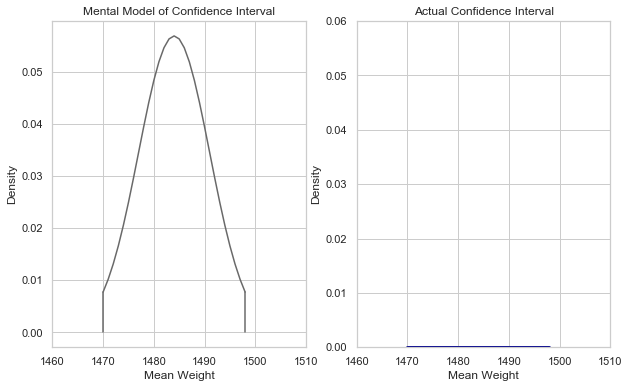

In [19]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 2, 1)
axes.set_title( r"Mental Model of Confidence Interval")
axes.set_xlabel( r"Mean Weight")
axes.set_ylabel( "Density")
xs = np.linspace( 1470, 1498, 1498 - 1470 + 1)
axes.plot( xs, [stats.norm.pdf(x, 1484, 7.01) for x in xs], color="dimgray")
axes.plot([1470, 1470], [0, stats.norm.pdf( 1470, 1484, 7.01)], color="dimgray")
axes.plot([1498, 1498],[ 0, stats.norm.pdf( 1498, 1484, 7.01)], color="dimgray")
axes.set_xlim(1460, 1510)

axes = figure.add_subplot(1, 2, 2)
axes.set_title( r"Actual Confidence Interval")
axes.set_xlabel( r"Mean Weight")
axes.set_ylabel( "Density")
axes.plot( [1470, 1498], [0.0001, 0.0001], color="darkblue", linewidth=3)
axes.set_xlim(1460, 1510)
axes.set_ylim(0, 0.06)



Put another way, a Confidence Interval has no $y$ dimension...it only exists in $x$.

## Hypothesis Testing

As I mentioned before, Team Fisher and Team Neyson (Neyman/Pearson) feuded in the journals of statistics for decades about the proper way of doing statistical inference. So far, I have only described Fisher's approach. Now we turn to Neyman/Pearson's approach. It sees a lot less use today because, ironically, of computer software that can easily calculate p-values but the language of modern Frequentist statistics comes mostly from Team Neyson so we need to investigate their approach a bit.

For one thing, they more or less dispensed with probability statements entirely. This was their method:

1. Specify a hypothesis ("alternative hypothesis") and a null hypothesis.
2. Set a level of statistical significance, called $\alpha$.
3. Determine which test statistic is appropriate for your experiment (estimator and score).
4. Set the *power* of the test, $\beta$, which determined sample size and thus the size of effect you could identify.
4. Collect the data as a random sample.
5. Calculate the test statistic.

There are certainly similarities. For Hypothesis Testing, $\alpha$ is the threshold of statistical significance although Neyman/Pearson didn't use that language. Let's see how Hypothesis Testing works for our cows. We can write our hypotheses as follows:

$H_0: \bar{x} - \mu = 0$

$H_A: \bar{x} - \mu <> 0$

Now we settle on a level of significance. These days this is often field specific. Ranging from $\alpha = 0.10$ in some social sciences to $\alpha=0.0001$ in astrophysics, $\alpha=0.05$ is a very common value. In Hypothesis Testing, there are four possibilities:

1. Reject $H_0$ when it is false. Good!
2. Reject $H_0$ when it is true. Type I error. Bad!
3. Fail to Reject $H_0$ when it is true. Good!
4. Fail to Reject $H_0$ when it is false. Type II error. Bad!

$\alpha$ controls the rate of Type I error. $\beta$ controls the rate of Type II error. Depending on the fashions of the philosophy of science, "Fail to Reject" may be "Accept". In a strict Positivist interpretation of science, we never accept or prove anything, we simply fail to *disprove* it.

So how do we reject or fail to reject? First, we look up (or calculate these days), the "critical value" for our $\alpha$. We've already talked about it, it's either -1.96 or 1.96 depending on which side of the distribution we end up on.

Then we calculate the t-score:

$t\_score = \frac{\bar{x}- \mu}{se}$

which we have already done, it was -2.16.

Because -2.16 is less than -1.96, we **reject** the null hypothesis that our sample mean is equal to the population mean.

Again, this approach is a statement about *process*. We following this process we will do the right thing about 19 times out of 20 (if we always use an $\alpha$ of 0.05). It says nothing about the probability of particular results.

And people hated that.

## The Modern Synthesis

While Team Fisher (well, he was Team of 1) and Team Neyson fought over whose method was superior (and it wasn't always civilized), scientists in the field needed to do *something* and textbook writers and methodologists needed to tell them what to do. At first, lacking computers, Hypothesis Testing carried the day. At some point, people wanted to make some probability statement about their specific experiment not "the process of experimentation as long as this process was followed" and Fisher's p-value was shoved into Hypothesis Testing.

Over the years, things have started to go awry.

1. Ioannidis [2005] showed that most published findings were false. There has been a lot of back and forth on this issue but a subsequent report by Bayer showed that nearly two-thirds of published medical research results were not reproducible.
2. Journals have concentrated on publishing statistically significant results at the expense of meaningful results.
3. Authors have engaged in "p-hacking", that is finding tests, hypotheses, or interpretations that *are* statistically significant.

As a result, some journals require authors to demonstrate the meaningfulness of results or to publish confidence intervals instead of p-values. The latest salvo in the discussion (2017) is to require that results meet an $\alpha$ of 0.005 instead of 0.05 (which is just wrong headed).

It has gotten so bad that the American Statistical Association had to publish guidelines on p-values in March 2016. Notice how carefully everthing needs to be worded:

1. P-values can indicate how incompatible the data are with a specified statistical model.
2. P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
3. Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
4. Proper inference requires full reporting and transparency.
5. A p-value, or statistical significance, does not measure the size of an effect or the importance of a result.
6. By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

At which point one has to really ask oneself, why use them? They go on,

> In light of misuses of and misconceptions concerning p-values, the statement notes that statisticians often supplement or even replace p-values with other approaches. These include methods “that emphasize estimation over testing such as confidence, credibility, or prediction intervals; Bayesian methods; alternative measures of evidence such as likelihood ratios or Bayes factors; and other approaches such as decision-theoretic modeling and false discovery rates.”

## Why Bayes?

So an interesting thing happened on the way to the Bootstrap. You might of noticed that I mentioned above that Frequentists are trying to establish $P(D|\theta)$ and Bayesians are trying to establish $P(\theta|D)$. However, if you assume a uniform prior, I demonstrated that those are proportional to each other. Additionally, I showed how we can estimate that posterior using the Bootstrap.

If follows that you can estimate the p-value and confidence interval using the Bootstrap as well. Even more, the Frequentist confidence interval and the Bayesian credible interval (although some just call it the "confidence interval" as well) are *numerically* exactly the same...but they still mean different things. 

And this is the answer to, "Why Bayes?"

1. I'd rather know the probability of the models, given the data than the probability of the data given the null hypothesis.
2. I'd rather work with many models instead of only two.
3. I'd rather work with the entire posterior distribution instead of a confidence interval that only tells me a range, is only the right range 95% of the time, and can't say if *this* range is right.
4. In Frequentist inference, which model is the null can affect the results (you can switch the roles of null and alternative and get different conclusions). In Bayesian inference, this doesn't happen.
5. In Frequentist inference, you cannot "peek" at your experimental results as they come in. This poisons the *process*. This doesn't matter for Bayesian inference, if you decided to stop getting more data, so be it.
6. In Frequentist inference, because it is a process, if you have many tests at once, you must apply a "Bonferroni" correction (although there is some debate about this). For Bayesian inference, you do not.
7. Bayesian inference results are much easier to explain and fit better in the business sense of expected value and confidence.
8. Bayesian inference just isn't that hard anymore.
9. Bayesian inference is applicable to a wider range of problems.
10. Bayesian inference can be expanded to more sophisticated levels of modeling.

`#teambayes`